<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

Адаптивная способность - способность к корректировке исходной гипотезы на ходу. Ну или в данном случае скорость реакции на резкие изменения в значениях временного ряда. Таким образом она тем больше, чем больше $\alpha$.

Однако

При большем $\alpha$ алгоритм быстрее реагирует на изменение значений, а при меньшем достигается большая плавность 

На данных без шума наилучший выбор - $\alpha = 1$. При наличии шума $\alpha$ стоит увеличивать.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

$\alpha_1$ отвечает за адаптивную способность алгоритма оценивающего тренд

1) Его стоит брать близким к 0
2) Его стоит брать близким к 1

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):

$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,

$$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    
$$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

Имея правые части, можно из 1 строки выразить ошибку (и отсюда будет следовать левая часть первой строки):

$$ e_t = \frac 1 \alpha (-l_{t - 1} - b_{t - 1} + l_t) $$

Теперь подставим в 2 и 3 строки

$$ b_t = b_{t - 1} + \beta (-l_{t - 1} - b_{t - 1} + l_t) = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} $$

3 - картинка

<img src="3.jpg">

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


Hyp:



<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

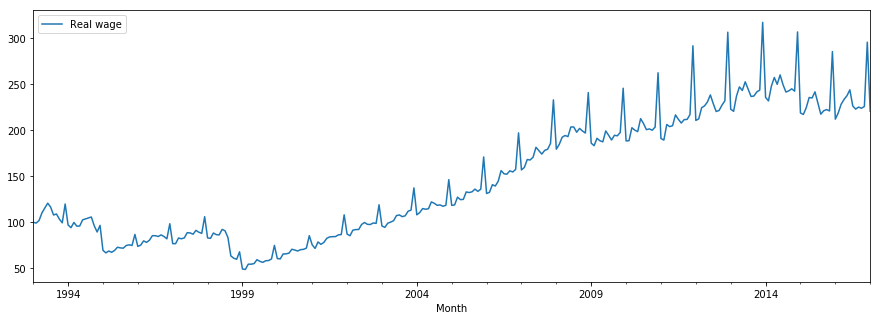

In [7]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('./monthly-wage.csv', sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)

wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [9]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline

wage = pd.read_csv('./monthly-wage.csv', sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)




In [45]:
# 0

ALPHA = np.array([1])
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':5} for alpha in ALPHA]
FRC_WAGE = BuildForecast(12, wage, AlgName = 'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())
print(FRC_WAGE)

{"IES {'alpha': 1, 'AdaptationPeriod': 5}":             Real wage
1993-01-01        NaN
1993-02-01        NaN
1993-03-01        NaN
1993-04-01        NaN
1993-05-01        NaN
1993-06-01        NaN
1993-07-01        NaN
1993-08-01        NaN
1993-09-01        NaN
1993-10-01        NaN
1993-11-01        NaN
1993-12-01        NaN
1994-01-01     100.00
1994-02-01      99.04
1994-03-01     101.77
1994-04-01     110.05
1994-05-01     115.47
1994-06-01     120.65
1994-07-01     116.38
1994-08-01     107.85
1994-09-01     108.93
1994-10-01     103.39
1994-11-01      99.35
1994-12-01     119.75
1995-01-01      97.00
1995-02-01      94.09
1995-03-01      99.74
1995-04-01      95.75
1995-05-01      95.84
1995-06-01     102.55
...               ...
2015-08-01     241.20
2015-09-01     242.50
2015-10-01     244.70
2015-11-01     242.20
2015-12-01     306.40
2016-01-01     218.50
2016-02-01     216.90
2016-03-01     224.30
2016-04-01     235.30
2016-05-01     234.80
2016-06-01     241.40
2016-07-01

In [51]:
# 1
# optimal value is closer to 0
ALPHA = np.arange(0, 1 + 1e-8, 0.1)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':5} for alpha in ALPHA]
FRC_WAGE = BuildForecast(12, wage, AlgName = 'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())


ix = wage.loc['1998-09-01':'2015-01-31'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityRMSE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 1.0, 'AdaptationPeriod': 5}                    16.505450
IES {'alpha': 0.90000000000000002, 'AdaptationPeriod': 5}    16.801133
IES {'alpha': 0.80000000000000004, 'AdaptationPeriod': 5}    17.285355
IES {'alpha': 0.70000000000000007, 'AdaptationPeriod': 5}    17.910466
IES {'alpha': 0.60000000000000009, 'AdaptationPeriod': 5}    18.644791
IES {'alpha': 0.5, 'AdaptationPeriod': 5}                    19.476225
IES {'alpha': 0.40000000000000002, 'AdaptationPeriod': 5}    20.424103
IES {'alpha': 0.30000000000000004, 'AdaptationPeriod': 5}    21.578369
IES {'alpha': 0.20000000000000001, 'AdaptationPeriod': 5}    23.259853
IES {'alpha': 0.10000000000000001, 'AdaptationPeriod': 5}    27.157713
IES {'alpha': 0.0, 'AdaptationPeriod': 5}                    86.451405
dtype: float64

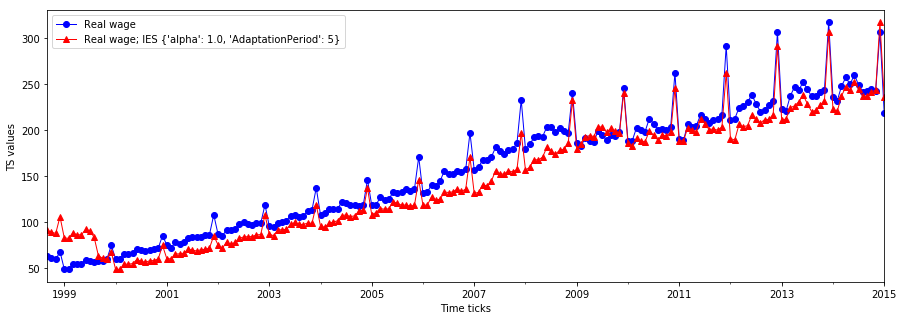

In [52]:
# 2
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
loc = wage.loc['1998-09-01':'2015-01-31']
ix = wage.loc['1998-09-01':'2015-01-31'].index
plotTSForecast(loc, FRC_WAGE[algName].loc[loc.index]
               , ts_num=100, alg_title=algName)

** Question**
    * Does SES follow to the TS components?
    
    Да, но немного отстаёт по тренду

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [77]:
# 3
ALPHA = np.arange(0, 1 + 1e-8, 0.05)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':5} for alpha in ALPHA]
FRC_WAGE = BuildForecast(12, wage, AlgName = 'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

loc = wage.loc['2015-02-01':'2017-01-31']
ix = loc.index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityRMSE(wage.loc[ix], frc_wage.loc[ix])

Real wage    14.350246
dtype: float64

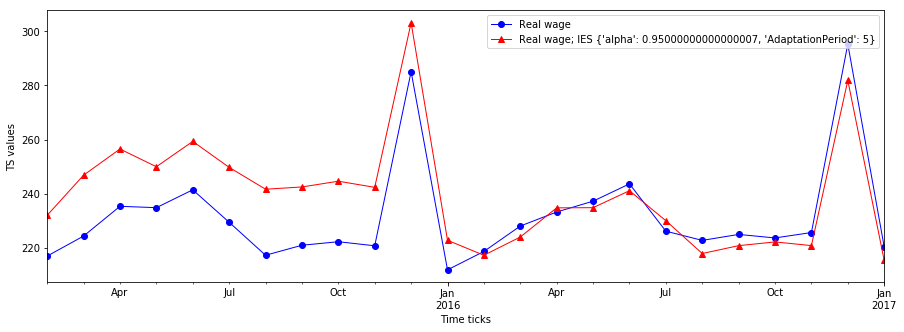

In [50]:

algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(loc, FRC_WAGE[algName].loc[loc.index]
               , ts_num=100, alg_title=algName)

qualityRMSE(wage.loc[ix], FRC_WAGE[algName].loc[ix])[0]

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [83]:
wage.index



DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Month', length=289, freq=None)

In [136]:

import math
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T + h)
    
    l = np.NaN
    s = np.array([np.NaN] * p)
    
    for cntr in range(T):
        xc = float(x.iloc[cntr]);
        if not math.isnan(xc):
            if math.isnan(l):
                l = xc 
 
            # seasonmoment
            sm = cntr % p
        
            if math.isnan(s[sm]):
                s[sm] = xc - l

            l = alpha * (xc - s[sm]) + (1 - alpha) * l
            s[sm] = (1 - delta) * s[sm] + delta * (xc - l)
            
        FORECAST[cntr + h] = (0 if math.isnan(l) else l) +\
            (0 if math.isnan(s[(cntr + h) % p]) else s[(cntr + h) % p])
        #print(l, s[(cntr + h) % p], FORECAST[cntr + h])
    return FORECAST

In [137]:
# Put your code here
forecast = WintersExponentialSmoothing(wage, 12, {
    'alpha': 0.3,
    'delta': 0.3,
    'seasonality_period': 12,
})

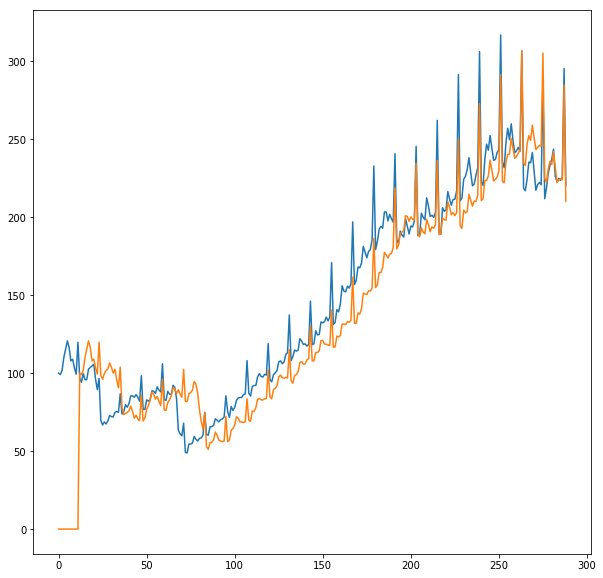

In [138]:
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(10, 10))

loc = wage.loc['1998-09-01':'2015-01-31']
ix = wage.loc['1998-09-01':'2015-01-31'].index

x = np.arange(0, len(wage), 1)

plt.plot(x, wage.iloc[x])
plt.plot(x, forecast[x])

plt.show()

In [203]:
from scipy.optimize import minimize

x = np.array([0, 0]) 

def loss_f(alpha, delta):
    forecast = WintersExponentialSmoothing(wage, 12, {
        'alpha': alpha,
        'delta': delta,
        'seasonality_period': 12,
    })
    x = np.arange(12, len(wage), 1)
    #print(list(zip(np.array(wage.iloc[x]).ravel(), forecast[x])))
    return ((np.array(wage.iloc[x]).ravel() - forecast[x]) ** 2).sum() ** 0.5

def plot_f(alpha, delta):
    forecast = WintersExponentialSmoothing(wage, 12, {
        'alpha': alpha,
        'delta': delta,
        'seasonality_period': 12,
    })

    fig = plt.figure(figsize=(10, 10))

    loc = wage.loc['1998-09-01':'2015-01-31']
    ix = wage.loc['1998-09-01':'2015-01-31'].index

    x = np.arange(12, len(wage), 1)

    plt.plot(x, wage.iloc[x])
    plt.plot(x, forecast[x])
    plt.title("loss = " + str(loss_f(alpha, delta)))
    plt.show()




(loss_f(0, 0), loss_f(0.2, 0.2))

(1299.7478811677286, 307.51024948612712)

In [204]:
# Минимизируем функцию потерь с ограничениями на параметры
best_opt = minimize(lambda x: loss_f(x[0], x[1]), x0=[0.5, 0.5], method="TNC", bounds = \
               np.array(((0, 1), (0, 1),)))
best_opt

     fun: 266.0721043251246
     jac: array([-1.2713997,  0.       ])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 2
  status: 0
 success: True
       x: array([ 1.        ,  0.91104568])

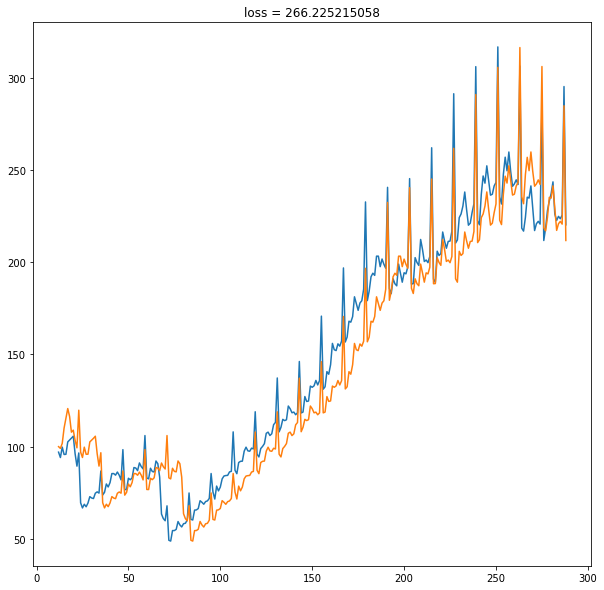

In [206]:
plot_f(0.9, 0.91104)

Не понятно, что автор условия имеет в виду под accuracy. Все-таки значения-то вещественные

Результаты этой IES и Winters Model довольно схожи. В принципе их можно использовать для прогноза

Заметно, что алгоритм "не успевает" за изменениями тренда

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [3]:
# Put your code here

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [ ]:
# Put your code here